# Gain and Lift

Gain chart and lift chart are two measures that are used for measuring the benefits of using the logistic regression model (in general, analytical model) and are used in business contexts such as target marketing. In target marketing or marketing campaigns, customers’ responses to campaign are usually very low (in many cases the customers who respond to marketing campaigns are less than 1%).

To illustrate the gain and lift charts, we will be using the bank marketing dataset. The data describes a problem in which a bank is interested in predicting which customers may respond to their direct marketing campaign to open a term deposit with the bank. The response variable Y = 1 implies that the customer opens a term deposit after the campaign and Y = 0 otherwise. The marketing campaign is based on the phone calls.

Gain = (Cumulative number of positive observations upto decile i) / (Total number of positive observations in the data)

Lift = (Cumulative Number of Positive Observations upto decile i in LR model) / 
        (Cumulative Number of Positive Observations upto decile i in random model)

### Data Description for Bank Marketing Dataset

#### Age
Dtype : Numeric

Desc : Age of the client who is the target of this marketing exercise


#### Job
Dtype : Categorical

Desc : Type of job (admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)


#### Marital
Dtype : Categorical

Desc : Marital Status (married, divorced, single)


#### Education
Dtype : Categorical

Desc : Education qualification (unknown, secondary, primary, tertiary)


#### Default
Dtype : Categorical

Desc : Customer has credit in default? (yes, no)


#### Balance
Dtype : Numerical

Desc : Average yearly balance, in euros


#### Housing Loan
Dtype : Categorical

Desc : has housing loan (no, yes)


#### Personal Loan
Dtype : Categorical

Desc : has personal loan (no, yes)


#### Previous Campaign
Dtype : Numerical

Desc : Number of contacts performed before this campaign and for this client


#### Subscribed
Dtype : Categorical

Desc : Has the client subscribed a term deposit? (yes, no)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_df = pd.read_csv('Datasets/bank.csv', delimiter=';')

In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
new_bank_df = bank_df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'previous', 'y']]

In [5]:
new_bank_df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,previous,y
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [6]:
new_bank_df['Subscribed'] = new_bank_df['y']

/var/folders/y9/54zzfyhs7f72c0_0zfrb98yr0000gn/T/ipykernel_53019/1598972698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bank_df['Subscribed'] = new_bank_df['y']


In [7]:
new_bank_df.drop('y', axis=1, inplace=True)
new_bank_df.head()

/var/folders/y9/54zzfyhs7f72c0_0zfrb98yr0000gn/T/ipykernel_53019/574600470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bank_df.drop('y', axis=1, inplace=True)


,age,job,marital,education,default,balance,housing,loan,campaign,previous,Subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [8]:
new_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   campaign    4521 non-null   int64 
 9   previous    4521 non-null   int64 
 10  Subscribed  4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [9]:
new_bank_df.Subscribed.value_counts()

Subscribed
no     4000
yes     521
Name: count, dtype: int64

The dataset has a total of 4521 observations, out of which 521 customers subscribed the term deposit
(approximately 11.5%) and the remaining 4000 did not subscribe the term deposit.

Let us capture the independent variables into the list X_features

In [10]:
X_features = list(new_bank_df.columns)
X_features.remove('Subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'previous']

Encode the categorical features into dummy variables using the following code:

In [11]:
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first=True, dtype=int)

The outcome variable subscribed is set to yes or no. This needs to be encoded as 1 (yes) and 0 (no).

In [12]:
Y = new_bank_df['Subscribed'].map({'yes': 1, 'no': 0})
X = encoded_bank_df

Here the dataset is not split into training and test datasets for simplicity as our objective is primarily to
understand gain and lift chart.

### Building Logistic Regression Model

In [13]:
import statsmodels.api as sm
logit_model = sm.Logit(Y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


In [14]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   Subscribed       Pseudo R-squared: 0.061     
Date:                 2025-12-09 14:40 AIC:              3082.2384 
No. Observations:     4521             BIC:              3236.2341 
Df Model:             23               Log-Likelihood:   -1517.1   
Df Residuals:         4497             LL-Null:          -1615.5   
Converged:            1.0000           LLR p-value:      1.4866e-29
No. Iterations:       7.0000           Scale:            1.0000    
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
campaign            -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous             0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing_yes         -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
loan_yes            -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [15]:
def get_significant_vars(lm):
	var_p_val_df = pd.DataFrame(lm.pvalues)
	var_p_val_df['vars'] = var_p_val_df.index
	var_p_val_df.columns = ['pvals', 'vars']
	return list(var_p_val_df[var_p_val_df['pvals'] <= 0.05]['vars'])

In [16]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['const',
 'campaign',
 'previous',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing_yes',
 'loan_yes']

Setting X_features to only significant variables and building a logistic regression model with the significant features.

In [17]:
X_features = ['campaign', 'previous', 'job_retired', 'marital_married', 'education_tertiary', 'housing_yes', 'loan_yes']
logit_model2 = sm.Logit(Y, sm.add_constant(X[X_features])).fit()
logit_model2.summary2()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   Subscribed       Pseudo R-squared: 0.056     
Date:                 2025-12-09 14:40 AIC:              3065.2182 
No. Observations:     4521             BIC:              3116.5501 
Df Model:             7                Log-Likelihood:   -1524.6   
Df Residuals:         4513             LL-Null:          -1615.5   
Converged:            1.0000           LLR p-value:      8.1892e-36
No. Iterations:       7.0000           Scale:            1.0000    
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4754   0.1133 -13.0260 0.0000 -1.6974 -1.2534
campaign           -0.0893   0.0236  -3.7925 0.0001 -0.1355 -0.0432
previous            0.1419   0.0211   6.7097 0.0000  0.1004  0.1833
job_retired         0.8246   0.1731   4.7628 0.0000  0.4853  1.1639
marital_married    -0.3767   0.0969  -3.8878 0.0001 -0.5667 -0.1868
education_tertiary  0.2991   0.1014   2.9500 0.0032  0.1004  0.4978
housing_yes        -0.5834   0.0986  -5.9179 0.0000 -0.7767 -0.3902
loan_yes           -0.7025   0.1672  -4.2012 0.0000 -1.0302 -0.3748
===================================================================

"""

P-value for LLR (Likelihood Ratio test) shows (less than 0.05) that the overall model is significant. We will predict the probabilities of the same observations as we have not split the dataset.

In [18]:
y_pred_df = pd.DataFrame({
    'actual' : Y,
    'predicted_prob': logit_model2.predict(sm.add_constant(X[X_features]))
})

Now sort the observations by their predicted probabilities in the descending order.

In [19]:
sorted_pred_df = y_pred_df[['predicted_prob', 'actual']].sort_values(by='predicted_prob', ascending=False)

After sorting, we will segment all the observations into deciles. First we will find the number of observations in each decile by dividing the total number of observations by 10.

In [20]:
num_per_decile = int(len(sorted_pred_df) / 10)
print("Number of observations per decile:", num_per_decile)

Number of observations per decile: 452


The function get_deciles() takes a DataFrame and segments the observations into deciles and marks each observation with the decile number it belongs to. The DataFrame with sorted probabilities should be passed to this function.

In [21]:
def get_deciles(df):
    # set first decile value
    df['decile'] = 1

    idx = 0
    # Iterate over all 10 deciles
    for each_d in range(0, 10):
        # Setting each 452 observations to one decile in sequence
        df.iloc[idx: idx + num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile

    df['decile'] = df['decile'] + 1
    return df

In [22]:
deciles_predict_df = get_deciles(sorted_pred_df)

In [23]:
deciles_predict_df[0:10]

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1
4397,0.619146,0,1
2070,0.609129,0,1
3023,0.573199,0,1
4080,0.572364,0,1
804,0.559350,0,1


### Calculating Gain

To calculate the gain, we need to find how many subscriptions (how many 1’s) are available in each decile. For this, the actual column value can be summed for each decile.

In [24]:
gain_lift_df = pd.DataFrame(
    deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()

gain_lift_df.columns = ['decile', 'gain']

And then the cumulative sum for each subsequent decile divided by the total number of 1’s available will give the gain percentage.

In [25]:
gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [26]:
gain_lift_df

,decile,gain,gain_percentage
0,1,125,23.992322
1,2,83,39.923225
2,3,73,53.934741
3,4,53,64.107486
4,5,31,70.057582
5,6,46,78.886756
6,7,37,85.988484
7,8,28,91.362764
8,9,25,96.161228
9,10,20,100.000000


So, if we target only the first 50% of the customers, we have almost 70% subscriptions. The change in gain percentage can be plotted for better understanding.

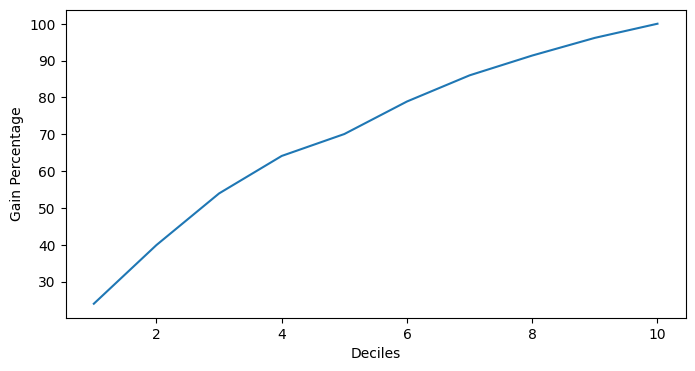

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(gain_lift_df.decile, gain_lift_df.gain_percentage)
plt.xlabel('Deciles')
plt.ylabel('Gain Percentage')
plt.show()

The chart in above figure shows the increase in gain against deciles. It can be observed that the marginal increase in gain reduces significantly as decile progress.

### Lift Gain

Lift can be calculated by dividing the gain percentage by the decile number.

In [30]:
gain_lift_df['lift'] = (gain_lift_df.gain_percentage / (gain_lift_df.decile * 10) )
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,125,23.992322,2.399232
1,2,83,39.923225,1.996161
2,3,73,53.934741,1.797825
3,4,53,64.107486,1.602687
4,5,31,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,37,85.988484,1.228407
7,8,28,91.362764,1.142035
8,9,25,96.161228,1.068458
9,10,20,100.000000,1.000000


The gain_lift_df depicts the lift value against decile numbers.

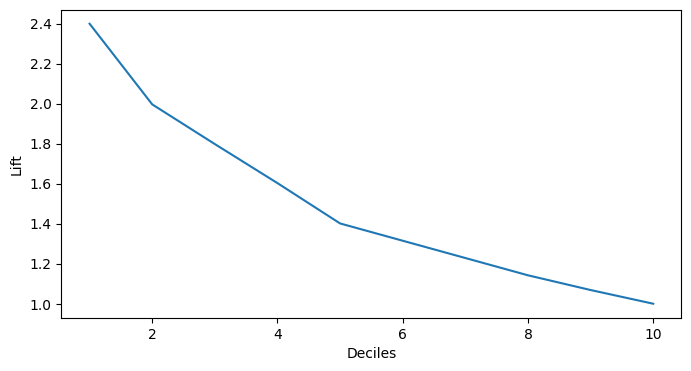

In [31]:
plt.figure(figsize=(8, 4))
plt.plot(gain_lift_df.decile, gain_lift_df.lift)
plt.xlabel('Deciles')
plt.ylabel('Lift')
plt.show() 